In [1]:
%matplotlib inline
import os
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# The cancer.DESCR stores the description of breast cancer dataset.
# Description of the data.
# Load the breast cancer dataset from sklearn.
cancer = load_breast_cancer()
print(cancer.DESCR[27:3130])


Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radius, field
        10 is Rad

In [3]:
#Read data into dataFrame
data = pd.read_csv("data/data.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#drop unnamed:32
data =data.drop(labels=["Unnamed: 32"],axis=1)


In [8]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Assign X (data) and y (target)
list = ["id", "diagnosis"]
X = data.drop(list, axis=1)
y = data["diagnosis"]
print(X.shape, y.shape)

(569, 30) (569,)


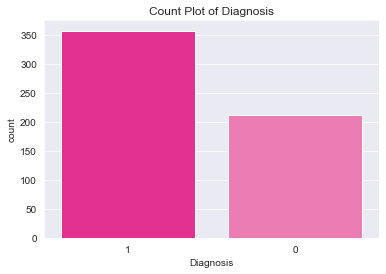

Number of Benign:  357
Number of Malignant :  212


In [10]:
#Count plots for diagnosis
sns.set_style('darkgrid')
sns.countplot(cancer['target'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(cancer['target']).iloc[:17].index)
#ax = sns.countplot(y,label="Count")       
B, M = y.value_counts()
plt.xlabel("Diagnosis")
plt.title("Count Plot of Diagnosis")
plt.show()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

In [11]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


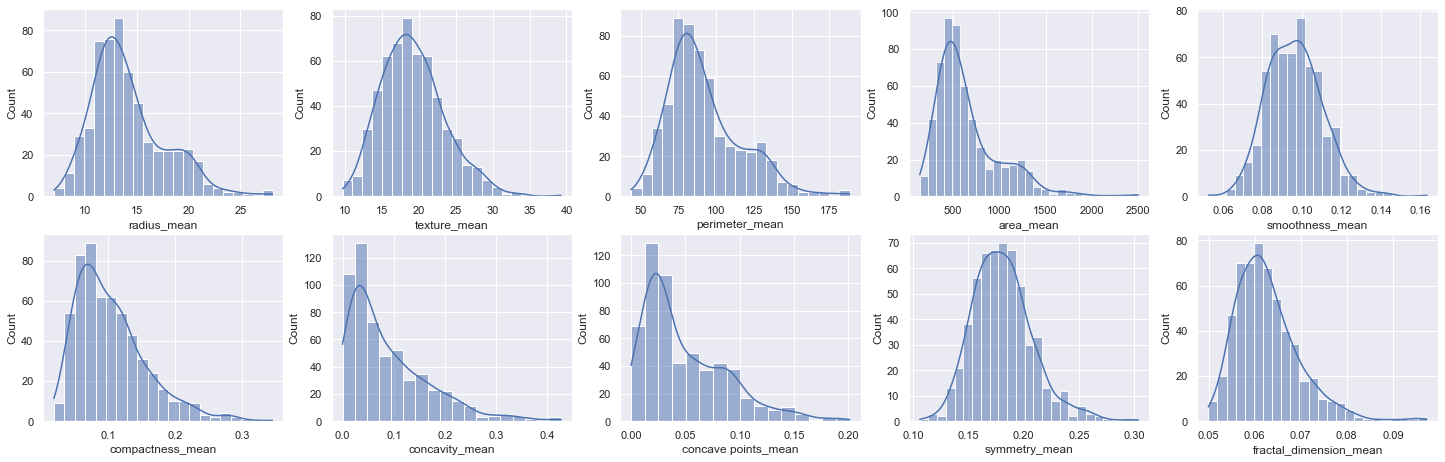

In [12]:
#Plot distribution plots for the 10 key features
plt.figure(figsize = (25, 20))
sns.set(style="darkgrid")
plotnumber = 1

for column in X:
    if plotnumber <= 10:
        ax = plt.subplot(5, 5, plotnumber)
        sns.histplot(X[column],kde=True)
        plt.xlabel(column)
        
    plotnumber += 1
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

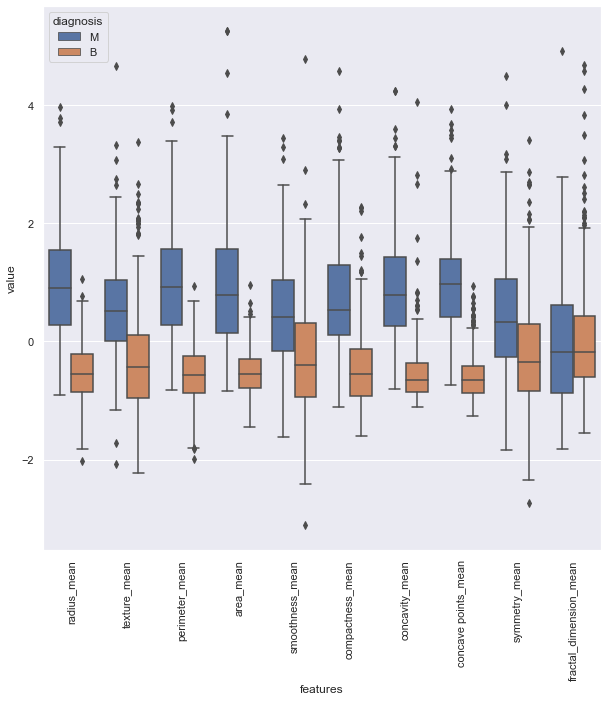

In [13]:
#Box plots of plots for the 10 key features

data_dia = y
data1 = X
data_n_2 = (data1 - data1.mean()) / (data1.std())              # standardization
data1 = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data1 = pd.melt(data1,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data1)
plt.xticks(rotation=90)

<AxesSubplot:>

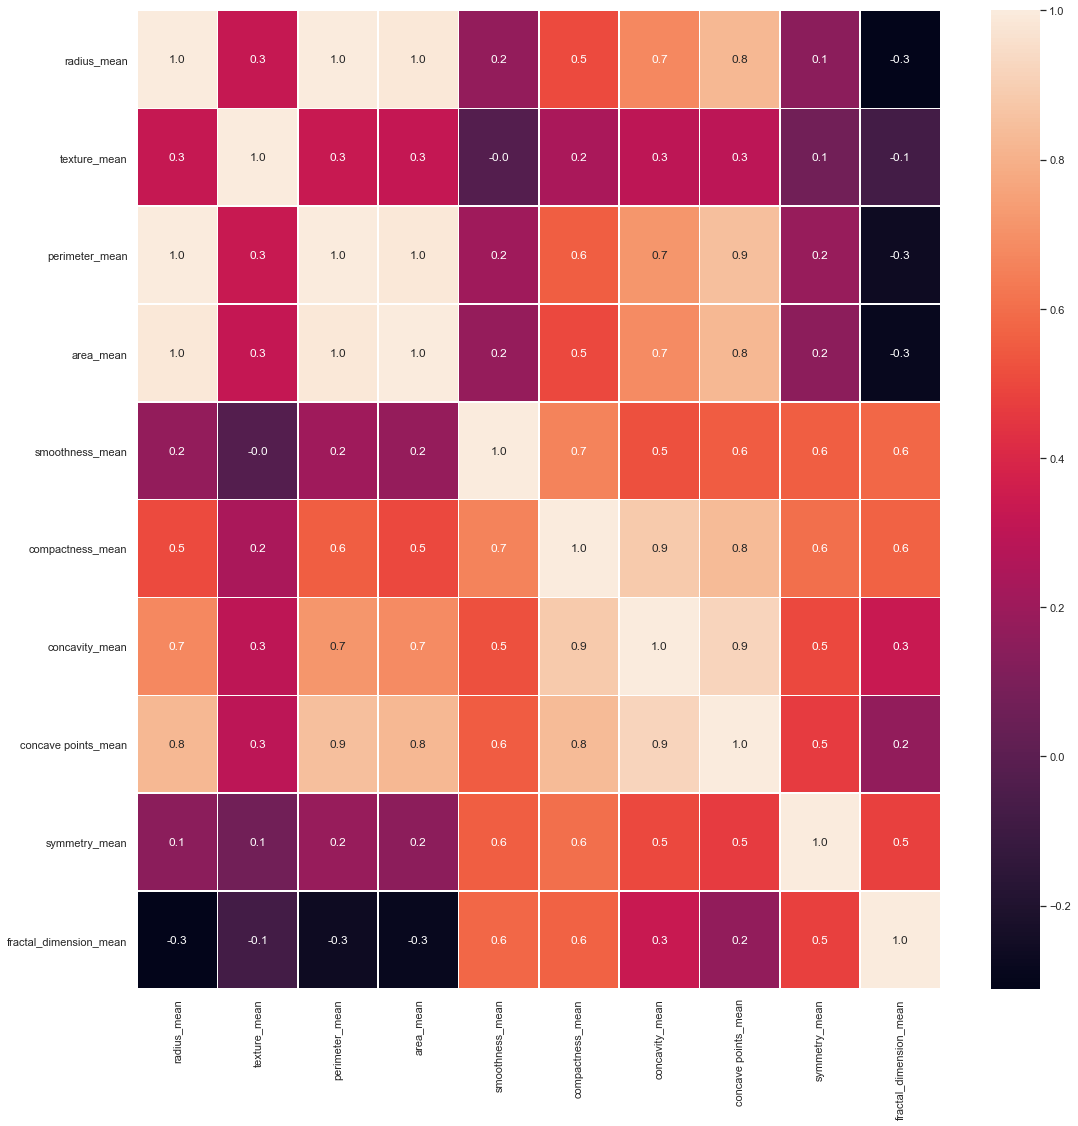

In [14]:
#correlation map for the 10 key features
X1 = X.iloc[:,0:10]
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

#Feature Selection: 

In [15]:
from sklearn.feature_selection import SelectKBest, chi2
feature_selection = SelectKBest(chi2, k=10)
feature_selection.fit(X, y)
selected_features = X.columns[feature_selection.get_support()]
print("The ten selected features are: ", selected_features)

The ten selected features are:  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst'],
      dtype='object')


In [16]:
best_features = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'perimeter_se', 'area_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst']]
best_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,perimeter_se,area_se,radius_worst,texture_worst,perimeter_worst,area_worst
0,17.99,10.38,122.80,1001.0,8.589,153.40,25.38,17.33,184.60,2019.0
1,20.57,17.77,132.90,1326.0,3.398,74.08,24.99,23.41,158.80,1956.0
2,19.69,21.25,130.00,1203.0,4.585,94.03,23.57,25.53,152.50,1709.0
3,11.42,20.38,77.58,386.1,3.445,27.23,14.91,26.50,98.87,567.7
4,20.29,14.34,135.10,1297.0,5.438,94.44,22.54,16.67,152.20,1575.0


In [17]:
print(best_features.shape, y.shape)

(569, 10) (569,)


# Logistical Regression Model

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=42)

In [19]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [21]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [22]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9874371859296482
Testing Data Score: 0.9824561403508771


In [23]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['B' 'M' 'M' 'B' 'B' 'M' 'M' 'M' 'B' 'B']
First 10 Actual labels: ['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B']


In [24]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,B,B
1,M,M
2,M,M
3,B,B
4,B,B
...,...,...
166,B,B
167,B,B
168,B,B
169,M,M


In [25]:
#Logisitical regression using selected features from SelectKBest
best_features_train, best_features_test, y_train, y_test = train_test_split(best_features,y, test_size=0.3,random_state=42)

In [26]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler_best = StandardScaler()
best_features_train = scaler_best.fit_transform(best_features_train)
best_features_test = scaler_best.transform(best_features_test)

In [27]:
classifier_best = LogisticRegression()
classifier_best.fit(best_features_train, y_train)
print(f"Training Data Score: {classifier_best.score(best_features_train, y_train)}")
print(f"Testing Data Score: {classifier_best.score(best_features_test, y_test)}")

Training Data Score: 0.9422110552763819
Testing Data Score: 0.9707602339181286


Logistical regression with selected features has lower performance score as unselected features

# Decision Tree and Random Forest Models

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [29]:
data = pd.read_csv("data/data.csv")

In [30]:
data =data.drop(labels=["Unnamed: 32"],axis=1)

In [31]:
# Assign X (data) and y (target)
list = ["id", "diagnosis"]
X = data.drop(list, axis=1)
y = data["diagnosis"]
print(X.shape, y.shape)

(569, 30) (569,)


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

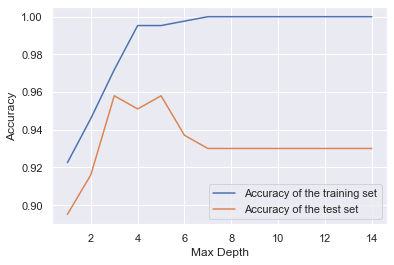

In [33]:
training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)
print('Accuracy of the Training Set for Decision Tree: {:.3f}'.format(clf.score(X_train,y_train)))
print('Accuracy of the Test Set for Decision Tree: {:.3f}'.format(clf.score(X_test,y_test)))

Accuracy of the Training Set for Decision Tree: 1.000
Accuracy of the Test Set for Decision Tree: 0.944


In [35]:
from sklearn.model_selection import train_test_split
best_features_train, best_features_test, y_train, y_test = train_test_split(best_features,y, test_size=0.3,random_state=42)

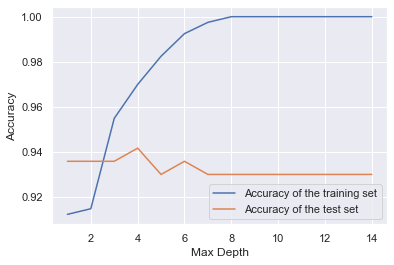

In [36]:
training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(best_features_train,y_train)
    training_accuracy.append(tree.score(best_features_train, y_train))
    test_accuracy.append(tree.score(best_features_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [37]:
#Decision Tree Best features
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(best_features_train, y_train)
clf.score(best_features_test, y_test)
print('Accuracy of the Training Set for Decision Tree: {:.3f}'.format(clf.score(best_features_train,y_train)))
print('Accuracy of the Test Set for Decision Tree: {:.3f}'.format(clf.score(best_features_test,y_test)))

Accuracy of the Training Set for Decision Tree: 1.000
Accuracy of the Test Set for Decision Tree: 0.924


Decision tree with selected features performance worse than unselected features

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train, y_train)

print('Accuracy of the Training Set for Random Forest: {:.3f}'.format(rf.score(X_train,y_train)))
print('Accuracy of the Test Set for Random Forest: {:.3f}'.format(rf.score(X_test,y_test)))

Accuracy of the Training Set for Random Forest: 1.000
Accuracy of the Test Set for Random Forest: 0.972


In [40]:
from sklearn.model_selection import train_test_split
best_features_train, best_features_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100)
rf1 = rf1.fit(best_features_train, y_train)

print('Accuracy of the Training Set for Random Forest: {:.3f}'.format(rf1.score(best_features_train,y_train)))
print('Accuracy of the Test Set for Random Forest: {:.3f}'.format(rf1.score(best_features_test,y_test)))

Accuracy of the Training Set for Random Forest: 1.000
Accuracy of the Test Set for Random Forest: 0.965


Random Forest with selected features performed better than unselected features

# Support Vector Model 

In [41]:
from sklearn.svm import SVC
svc_model = SVC()


In [42]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
# Fit to the training data and validate with the test data
model = SVC(kernel='linear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [44]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["Benign", "Malignant"]))

              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97        89
   Malignant       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143



# K-Nearest Neighbor (KNN) Classification

In [45]:
from sklearn.neighbors import KNeighborsClassifier 

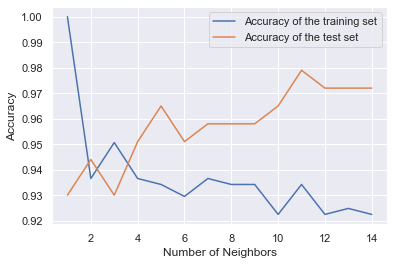

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

training_accuracy = []
test_accuracy = []

# Try KNN for diffrent K nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    # Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Train the model using the training set
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

Looking at the above plot, best result accurs when the Number of Neighbors is 6.

In [47]:
print("Accuracy of the Training Set for 6NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the Test Set for 6NN: {:3f}".format(test_accuracy[5]))

Accuracy of the Training Set for 6NN: 0.929577
Accuracy of the Test Set for 6NN: 0.951049


In [48]:
from sklearn.neighbors import KNeighborsClassifier 
best_features_train, best_features_test, y_train, y_test = train_test_split(X, y, random_state=42)

training_accuracy = []
test_accuracy = []

# Try KNN for diffrent K nearest neighbor from 1 to 15
neighbors_setting = range(1,15)
for n_neighbors in neighbors_setting:
    # Create KNN Classifier
    knn1 = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Train the model using the training set
    knn1.fit(best_features_train,y_train)
    training_accuracy.append(knn1.score(best_features_train, y_train))
    test_accuracy.append(knn1.score(best_features_test, y_test))
print("Accuracy of the Training Set for 6NN: {:3f}".format(training_accuracy[6]))
print("Accuracy of the Test Set for 6NN: {:3f}".format(test_accuracy[6]))

Accuracy of the Training Set for 6NN: 0.936620
Accuracy of the Test Set for 6NN: 0.958042


K-Nearest Neighbor analysis with selected features performed similar to unselected features

# Neural Network Model with Keras Tensorflow

In [49]:
from numpy.random import seed
seed(42)

In [50]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv("data/data.csv")
data =data.drop(labels=["Unnamed: 32"],axis=1)

In [52]:
# Assign X (data) and y (target)
list = ["id", "diagnosis"]
X = data.drop(list, axis=1)
y = data["diagnosis"]
print(X.shape, y.shape)

(569, 30) (569,)


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1)

In [54]:
#scaling data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
y_train1 = label_encoder.transform(y_train)
y_test1 = label_encoder.transform(y_test)

In [56]:
from tensorflow.keras.utils import to_categorical

In [57]:
# One-hot encoding
y_train_categorical = to_categorical(y_train1)
y_test_categorical = to_categorical(y_test1)
len(y_test_categorical)

171

In [58]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [59]:
from tensorflow.keras.layers import Dense
number_inputs = 30
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))

In [60]:
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [61]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 124       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 10        
Total params: 134
Trainable params: 134
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit (train) the model
model.fit(
    X_train,
    y_train_categorical,
    epochs=500,
    shuffle=True,
    verbose=2
)

Epoch 1/500
13/13 - 2s - loss: 0.5901 - accuracy: 0.6583
Epoch 2/500
13/13 - 0s - loss: 0.5098 - accuracy: 0.7337
Epoch 3/500
13/13 - 0s - loss: 0.4506 - accuracy: 0.7889
Epoch 4/500
13/13 - 0s - loss: 0.4060 - accuracy: 0.8442
Epoch 5/500
13/13 - 0s - loss: 0.3696 - accuracy: 0.8744
Epoch 6/500
13/13 - 0s - loss: 0.3412 - accuracy: 0.8945
Epoch 7/500
13/13 - 0s - loss: 0.3166 - accuracy: 0.9070
Epoch 8/500
13/13 - 0s - loss: 0.2961 - accuracy: 0.9146
Epoch 9/500
13/13 - 0s - loss: 0.2791 - accuracy: 0.9221
Epoch 10/500
13/13 - 0s - loss: 0.2633 - accuracy: 0.9246
Epoch 11/500
13/13 - 0s - loss: 0.2499 - accuracy: 0.9246
Epoch 12/500
13/13 - 0s - loss: 0.2366 - accuracy: 0.9296
Epoch 13/500
13/13 - 0s - loss: 0.2252 - accuracy: 0.9322
Epoch 14/500
13/13 - 0s - loss: 0.2151 - accuracy: 0.9372
Epoch 15/500
13/13 - 0s - loss: 0.2056 - accuracy: 0.9397
Epoch 16/500
13/13 - 0s - loss: 0.1971 - accuracy: 0.9472
Epoch 17/500
13/13 - 0s - loss: 0.1890 - accuracy: 0.9497
Epoch 18/500
13/13 - 0s

In [ ]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")